In [2]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
air_u = pd.read_csv('airquality.csv')
air_u

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [5]:
air_u.apply(lambda x: sum(x.isnull()),axis=0)

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [6]:
#features = air_u.loc[:,['Ozone','Solar.R']].values
features = air_u.iloc[:,:6].values
features

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)

imputer.fit(features[:,[0,1]])
features[:,[0,1]] = imputer.fit_transform(features[:,[0,1]])

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
df1 = pd.DataFrame(features)

In [9]:
df1

,0,1,2,3,4,5
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [10]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [11]:
#rename columns
df1.rename(columns = {0:"Ozone",1:"Solar.R",2:"Wind", 3:"Temp", 4:"Month", 5:"Day"}, inplace = True)
df1

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [19]:
x = df1.loc[:,['Temp', 'Ozone']].values
x

array([[ 67.        ,  41.        ],
       [ 72.        ,  36.        ],
       [ 74.        ,  12.        ],
       [ 62.        ,  18.        ],
       [ 56.        ,  42.12931034],
       [ 66.        ,  28.        ],
       [ 65.        ,  23.        ],
       [ 59.        ,  19.        ],
       [ 61.        ,   8.        ],
       [ 69.        ,  42.12931034],
       [ 74.        ,   7.        ],
       [ 69.        ,  16.        ],
       [ 66.        ,  11.        ],
       [ 68.        ,  14.        ],
       [ 58.        ,  18.        ],
       [ 64.        ,  14.        ],
       [ 66.        ,  34.        ],
       [ 57.        ,   6.        ],
       [ 68.        ,  30.        ],
       [ 62.        ,  11.        ],
       [ 59.        ,   1.        ],
       [ 73.        ,  11.        ],
       [ 61.        ,   4.        ],
       [ 61.        ,  32.        ],
       [ 57.        ,  42.12931034],
       [ 58.        ,  42.12931034],
       [ 57.        ,  42.12931034],
 

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans =  KMeans(n_clusters= i, init= 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

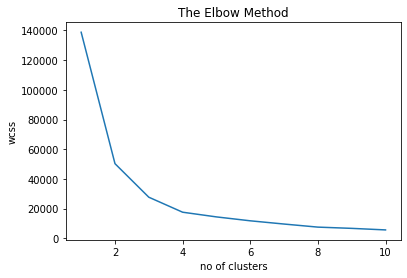

In [21]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

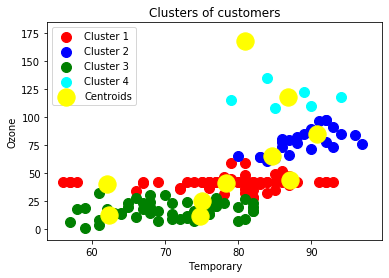

In [22]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

#For unsupervised learning we use "fit_predict()"
#y_kmeans is the final model . Now how and where we will deploy this model in 
#production is depends on what tool we are using.
#Visualizing all the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Temporary')
plt.ylabel('Ozone')
plt.legend()
plt.show()

In [23]:
# Split feature vectors and labels
x=df1[['Solar.R','Wind','Temp','Month','Day']]
y=df1[['Ozone']]

In [24]:
x

,Solar.R,Wind,Temp,Month,Day
0,190.000000,7.4,67.0,5.0,1.0
1,118.000000,8.0,72.0,5.0,2.0
2,149.000000,12.6,74.0,5.0,3.0
3,313.000000,11.5,62.0,5.0,4.0
4,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...
148,193.000000,6.9,70.0,9.0,26.0
149,145.000000,13.2,77.0,9.0,27.0
150,191.000000,14.3,75.0,9.0,28.0
151,131.000000,8.0,76.0,9.0,29.0


In [25]:
y

,Ozone
0,41.00000
1,36.00000
2,12.00000
3,18.00000
4,42.12931
...,...
148,30.00000
149,42.12931
150,14.00000
151,18.00000


In [26]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)

In [27]:
x_std

array([[ 4.64056617e-02, -7.28332230e-01, -1.15348973e+00,
        -1.41191599e+00, -1.65847407e+00],
       [-7.74833927e-01, -5.57463590e-01, -6.23507964e-01,
        -1.41191599e+00, -1.54509314e+00],
       [-4.21244659e-01,  7.52529314e-01, -4.11515256e-01,
        -1.41191599e+00, -1.43171220e+00],
       [ 1.44935663e+00,  4.39270141e-01, -1.68347150e+00,
        -1.41191599e+00, -1.31833127e+00],
       [ 0.00000000e+00,  1.23665713e+00, -2.31944963e+00,
        -1.41191599e+00, -1.20495033e+00],
       [ 0.00000000e+00,  1.40752577e+00, -1.25948609e+00,
        -1.41191599e+00, -1.09156940e+00],
       [ 1.28967115e+00, -3.86594951e-01, -1.36548244e+00,
        -1.41191599e+00, -9.78188462e-01],
       [-9.91549929e-01,  1.09426659e+00, -2.00146056e+00,
        -1.41191599e+00, -8.64807526e-01],
       [-1.90403836e+00,  2.88838731e+00, -1.78946786e+00,
        -1.41191599e+00, -7.51426591e-01],
       [ 9.20300832e-02, -3.86594951e-01, -9.41497026e-01,
        -1.41191599e+00

In [28]:
import numpy as np
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[ 1.00657895 -0.05560833  0.26429629 -0.07338406 -0.15535509]
 [-0.05560833  1.00657895 -0.46100096 -0.17946556  0.01856145]
 [ 0.26429629 -0.46100096  1.00657895  0.42371664 -0.11058947]
 [-0.07338406 -0.17946556  0.42371664  1.00657895 -0.03665089]
 [-0.15535509  0.01856145 -0.11058947 -0.03665089  1.00657895]]


In [29]:
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [30]:
print('\nEigen values \n%s' %eig_vals)


Eigen values 
[1.79097266 0.39129052 1.16193786 0.91738467 0.77130902]


In [188]:
eig_vals[0]/sum(eig_vals)

0.23086869961867726

In [193]:
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([-0.72833822, -0.69264575, -1.15724568, -1.38554005, -2.59610569,
       -2.00613268, -0.85196049, -2.62158536, -3.65151489, -0.93234791,
       -0.37790082, -0.95616388, -1.01526772, -1.18992338, -2.84023042,
       -1.42539333, -1.45596459, -3.69311088, -1.24040195, -2.20900842,
       -2.54097362, -1.70287148, -2.39281778, -2.55789702, -3.60373967,
       -2.73462253, -2.04383695, -2.44450445, -1.22979945, -0.12672951,
       -0.44475659,  0.46181657,  0.00481648, -1.56774887,  0.44749058,
        0.68207031, -0.46440576,  0.00666074,  1.16159826,  0.39334377,
        0.59174278,  0.89550201,  1.02869982,  0.19551817, -0.28702489,
       -0.06894398, -1.09940417, -2.05091457, -1.58241757, -1.14371866,
       -0.730382  , -0.05855221,  0.26471613, -0.08797351,  0.09720916,
       -0.56924211, -0.40271712, -1.33609209, -0.897621  , -1.81522011,
       -0.10227155,  1.81419397,  1.05833112,  0.72508558,  0.28062439,
        1.32331325,  0.77877761,  1.84734781,  1.90531116,  1.98

In [194]:
result=pd.DataFrame(projected_x,columns=['PC1'])   # PC1=Principal Component 1
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,-0.728338,0.0,41.00000
1,-0.692646,0.0,36.00000
2,-1.157246,0.0,12.00000
3,-1.385540,0.0,18.00000
4,-2.596106,0.0,42.12931
...,...,...,...
148,0.361160,0.0,30.00000
149,-0.228631,0.0,42.12931
150,-0.417691,0.0,14.00000
151,0.382154,0.0,18.00000


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA result')

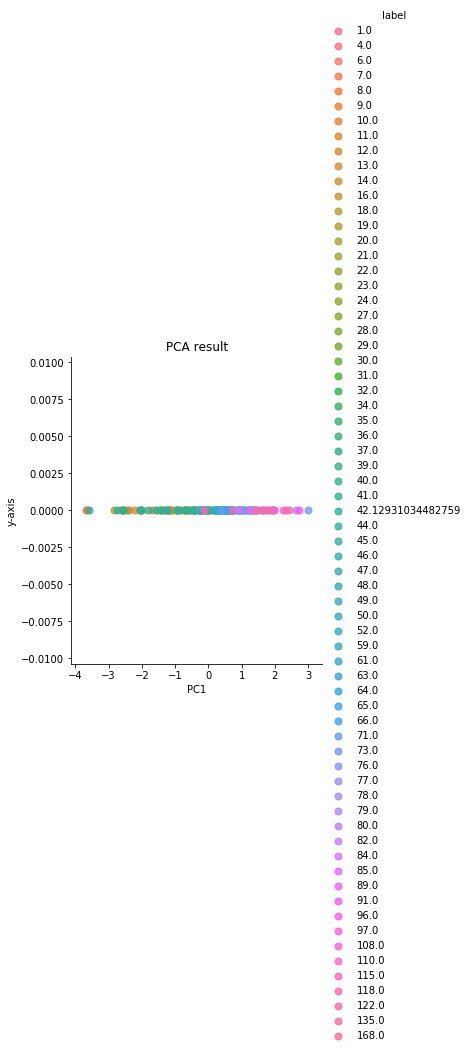

In [196]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')
plt.title('PCA result')